In [1]:
import pandas as pd
import numpy as np

In [2]:
dados = pd.read_csv('dados_alura_sem_null_sem_outlier.csv')
dados

,id_cliente,id_emprestimo,id_historico,tipo_imovel,motivo_emprestimo,grupo,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,INADIMPLENCIA,RISCO_INADIMPLENCIA
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,alugado,ensino,B,21,60000,2,8000,11.26,0.13,3,0.0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,financiado,ensino,A,40,70000,6,18000,7.90,0.26,14,0.0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,financiado,saude,C,29,115000,3,22000,15.23,0.19,7,1.0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,alugado,saude,B,26,84996,0,9000,11.26,0.11,2,0.0,0
4,OQXEoNPl-hL0f,QxdBboWP-KKFh,Ue0IMCKa-d0AQ,proprio,ensino,A,23,24000,7,5000,7.49,0.21,2,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,5RR3r0UI-zEcL,0sz5yOJO-BqcR,HeNCM6HW-srAM,financiado,reforma,E,24,69000,7,5200,17.19,0.08,2,0.0,0
27122,5PYYQrGb-kL7i,eKFBKFUg-EPMg,Y5h04JQz-UlnH,alugado,ensino,B,22,28800,6,8000,11.49,0.28,2,0.0,0
27123,ezodwdzy-IgP3,Z0OQkNXo-noen,W6NpiRzO-8o5z,financiado,quitar,A,27,39600,11,4800,6.76,0.12,9,0.0,0
27124,zcvLEBEd-JHhI,EtCzqy1B-QYEL,3fcjJLaj-Bkio,financiado,saude,C,30,39996,8,10000,12.73,0.25,6,0.0,0


## Testando apenas com os dados numéricos

In [44]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy médio: %.2f" % (media * 100))
  print("Accuracy intervalo: [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

x = dados[['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente', 'INADIMPLENCIA']]
y = dados['RISCO_INADIMPLENCIA']
SEED = 1
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 20344 elementos e testaremos com 6782 elementos
A acurácia do dummy classifier foi 79.09%


In [4]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 85.80%


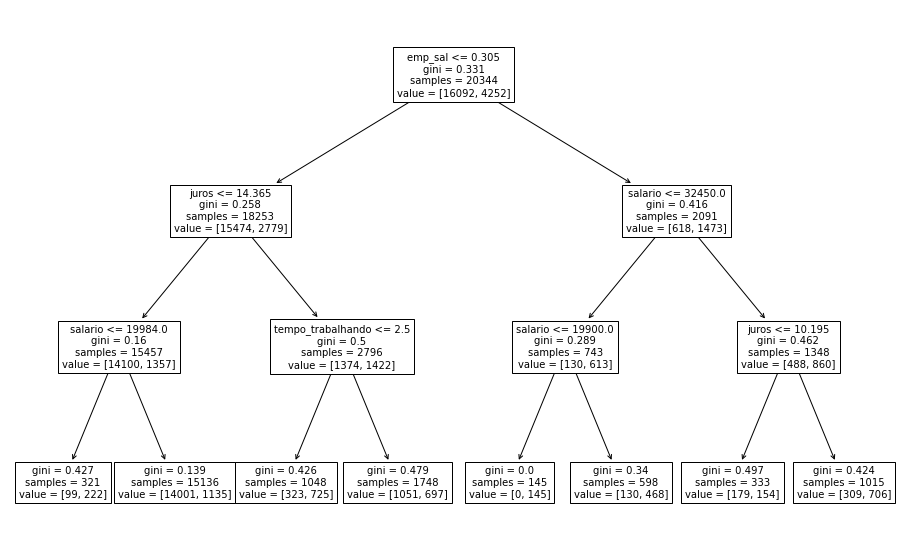

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))  
tree.plot_tree(clf, feature_names=['idade', 'salario', 'tempo_trabalhando', 'valor_emprestimo', 'juros',
       'emp_sal', 'tempo_cliente', 'INADIMPLENCIA'], fontsize=10)
plt.show()

In [6]:
from sklearn.model_selection import cross_validate
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [85.26, 86.57]


In [42]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [87.51, 88.22]


In [45]:
imprime_resultados(results)

Accuracy médio: 87.90
Accuracy intervalo: [86.53, 89.27]


In [8]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.03586912, 0.0289228 , 0.02978683, 0.02692914, 0.02217293]),
 'score_time': array([0.00420022, 0.00198841, 0.00306034, 0.00199413, 0.00170422]),
 'test_score': array([0.85698489, 0.86506912, 0.85898618, 0.85917051, 0.85548387])}

In [9]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.8589334 , 0.85819612, 0.86040796, 0.86778078, 0.85029499])

In [10]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.62871928, 0.6109238 , 0.61621622, 0.63301501, 0.59481038])

In [11]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.8589334 , 0.85819612, 0.86040796, 0.86778078, 0.85029499])

In [12]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.59624019, 0.57667174, 0.58531485, 0.61464403, 0.557283  ])

In [13]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.69928058, 0.71677215, 0.72380952, 0.75324675, 0.68453292])

In [14]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.57109283, 0.53231492, 0.53647059, 0.54588235, 0.52588235])

In [15]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.81573026, 0.82029788, 0.81947517, 0.83213749, 0.79906043])

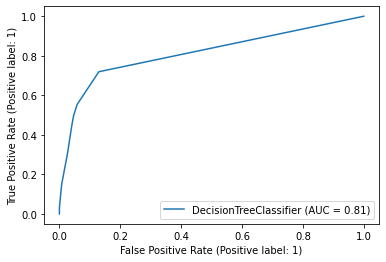

In [16]:
from sklearn.metrics import RocCurveDisplay
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(teste_y, previsoes))

[[5114  250]
 [ 713  705]]


In [18]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()* desvio_padrao * 100
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [85.20, 86.64]


In [39]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle=True)
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()* desvio_padrao * 100
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [87.66, 88.14]


## Agora transformando os dados categóricos

In [19]:
df_dummies = pd.get_dummies(dados.drop(['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA'], axis = 1))
df_dummies

,tipo_imovel_alugado,tipo_imovel_financiado,tipo_imovel_outro,tipo_imovel_proprio,motivo_emprestimo_ensino,motivo_emprestimo_pessoal,motivo_emprestimo_quitar,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27121,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
27122,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
27123,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
27124,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [20]:
df_modificado = dados[['id_cliente', 'id_emprestimo', 'id_historico', 
        'idade', 'salario', 'tempo_trabalhando',
       'valor_emprestimo', 'juros', 'emp_sal', 'tempo_cliente',
       'INADIMPLENCIA', 'RISCO_INADIMPLENCIA']]

In [21]:
dados_final = pd.concat([df_modificado, df_dummies], axis = 1)
dados_final.head()

,id_cliente,id_emprestimo,id_historico,idade,salario,tempo_trabalhando,valor_emprestimo,juros,emp_sal,tempo_cliente,...,motivo_emprestimo_reforma,motivo_emprestimo_risco,motivo_emprestimo_saude,grupo_A,grupo_B,grupo_C,grupo_D,grupo_E,grupo_F,grupo_G
0,AspC7qDK-5Esh,kZHfWgGv-0dWJ,UwfbzeaW-9tQt,21,60000,2,8000,11.26,0.13,3,...,0,0,0,0,1,0,0,0,0,0
1,2NjYU2iT-fGSm,j7elJxsY-eTEQ,viRQ2WYn-yJ2G,40,70000,6,18000,7.90,0.26,14,...,0,0,0,1,0,0,0,0,0,0
2,nTOKgZCT-YPUD,t9dKvc6a-4eAL,IEHObaim-KPC9,29,115000,3,22000,15.23,0.19,7,...,0,0,1,0,0,1,0,0,0,0
3,J3jGNZeh-OzZE,NaelpPC5-t2kz,GvqL52S8-S8OH,26,84996,0,9000,11.26,0.11,2,...,0,0,1,0,1,0,0,0,0,0
4,OQXEoNPl-hL0f,QxdBboWP-KKFh,Ue0IMCKa-d0AQ,23,24000,7,5000,7.49,0.21,2,...,0,0,0,1,0,0,0,0,0,0


In [22]:
dados_final.to_csv('dados.csv', index = False)

In [23]:
x = dados_final.drop(['id_cliente', 'id_emprestimo', 'id_historico', 'RISCO_INADIMPLENCIA'], axis = 1)
y = dados_final['RISCO_INADIMPLENCIA']

In [24]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
dummy_clf = DummyClassifier()
dummy_clf.fit(treino_x, treino_y)
acuracia = dummy_clf.score(teste_x, teste_y) * 100
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_y)))
print("A acurácia do dummy classifier foi %.2f%%" % acuracia)

Treinaremos com 20344 elementos e testaremos com 6782 elementos
A acurácia do dummy classifier foi 79.09%


In [25]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 88.00%


In [26]:
dados_final.columns

Index(['id_cliente', 'id_emprestimo', 'id_historico', 'idade', 'salario',
       'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal',
       'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA',
       'tipo_imovel_alugado', 'tipo_imovel_financiado', 'tipo_imovel_outro',
       'tipo_imovel_proprio', 'motivo_emprestimo_ensino',
       'motivo_emprestimo_pessoal', 'motivo_emprestimo_quitar',
       'motivo_emprestimo_reforma', 'motivo_emprestimo_risco',
       'motivo_emprestimo_saude', 'grupo_A', 'grupo_B', 'grupo_C', 'grupo_D',
       'grupo_E', 'grupo_F', 'grupo_G'],
      dtype='object')

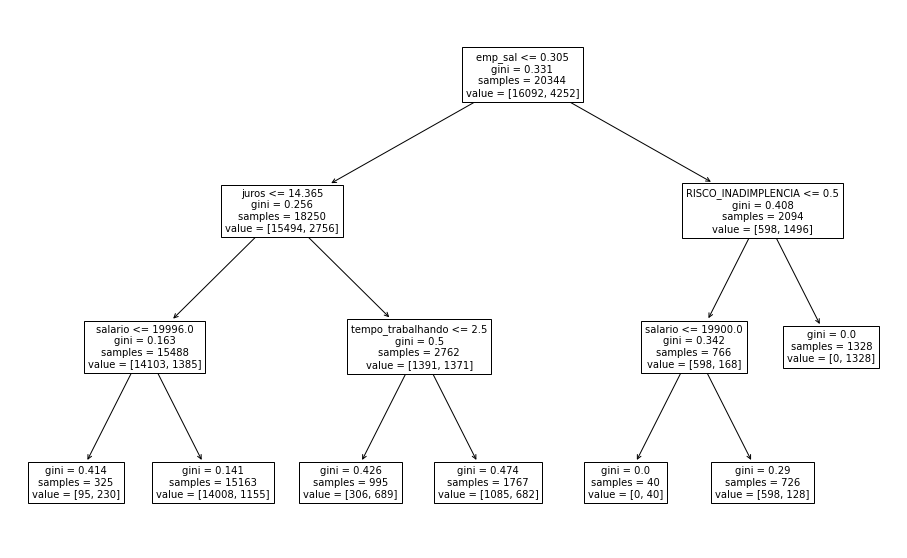

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))  
tree.plot_tree(clf, feature_names=['idade', 'salario',
       'tempo_trabalhando', 'valor_emprestimo', 'juros', 'emp_sal',
       'tempo_cliente', 'INADIMPLENCIA', 'RISCO_INADIMPLENCIA',
       'tipo_imovel_alugado', 'tipo_imovel_financiado', 'tipo_imovel_outro',
       'tipo_imovel_proprio', 'motivo_emprestimo_ensino',
       'motivo_emprestimo_pessoal', 'motivo_emprestimo_quitar',
       'motivo_emprestimo_reforma', 'motivo_emprestimo_risco',
       'motivo_emprestimo_saude', 'grupo_A', 'grupo_B', 'grupo_C', 'grupo_D',
       'grupo_E', 'grupo_F', 'grupo_G'], fontsize=10)
plt.show()

In [28]:
modelo = tree.DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [87.63, 88.39]


In [29]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(treino_x, treino_y)
previsoes = clf.predict(teste_x)
media = cross_val_score(clf, treino_x, treino_y, cv=5).mean()
desvio_padrao = cross_val_score(clf, treino_x, treino_y, cv=5).std()
print("Accuracy com cross validation, cv = 5 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, cv = 5 = [87.51, 88.22]


In [30]:
cross_validate(modelo, x, y, cv = 5)

{'fit_time': array([0.05086398, 0.03893018, 0.031914  , 0.02892089, 0.029531  ]),
 'score_time': array([0.00398898, 0.00298786, 0.00199938, 0.00199175, 0.00199437]),
 'test_score': array([0.8816808 , 0.88221198, 0.88036866, 0.87686636, 0.87926267])}

In [31]:
cross_val_score(clf, treino_x, treino_y, cv=5)

array([0.87957729, 0.88129762, 0.87711969, 0.87884001, 0.87635202])

In [32]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='f1')

array([0.64492754, 0.65226782, 0.7005988 , 0.64249456, 0.60111023])

In [33]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='accuracy')

array([0.87957729, 0.88129762, 0.87711969, 0.87884001, 0.87635202])

In [34]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='average_precision')

array([0.68340569, 0.68358819, 0.68694419, 0.67988473, 0.69137583])

In [35]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='precision')

array([0.83962264, 0.84044527, 0.71428571, 0.83901515, 0.92214112])

In [36]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='recall')

array([0.52352941, 0.53294118, 0.68742656, 0.52056404, 0.44588235])

In [37]:
cross_val_score(clf, treino_x, treino_y, cv=5, scoring='roc_auc')

array([0.82508817, 0.82817006, 0.83142999, 0.82794033, 0.8377348 ])

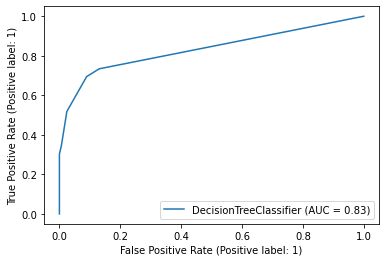

In [38]:
clf_disp = RocCurveDisplay.from_estimator(clf, teste_x, teste_y)

In [40]:
print(confusion_matrix(teste_y, previsoes))

[[6582  159]
 [ 949  930]]
